<a href="https://colab.research.google.com/github/sarim-devlopers/Digit-Recognizer/blob/main/nsfwclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

In [2]:
from transformers import pipeline

In [12]:
pipeline(task='sentiment-analysis')("I dont like completely but dislike a little jawan movie")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'NEGATIVE', 'score': 0.9927273988723755}]

In [13]:
!pip install transformers datasets torch torchvision pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [14]:
from transformers import pipeline
from PIL import Image

In [45]:
# Load a pre-trained NSFW detection model (adjust based on available models)
model_name = "microsoft/swin-base-patch4-window7-224"
model_name_ii = "Falconsai/nsfw_image_detection" # Example model for image classification
nsfw_pipeline = pipeline("image-classification", model=model_name_ii)

config.json:   0%|          | 0.00/724 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

Device set to use cuda:0


In [52]:
image_path = "/content/875_Staci_external.png"  # Replace with your image path
image = Image.open(image_path)

In [53]:
predictions = nsfw_pipeline(image)

In [54]:
print("Predictions:")
for pred in predictions:
    print(f"Label: {pred['label']}, Score: {pred['score']:.4f}")

Predictions:
Label: nsfw, Score: 0.9891
Label: normal, Score: 0.0121


In [55]:
import cv2

def extract_frames(video_path, frame_rate=1):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % frame_rate == 0:  # Capture every nth frame
            frames.append(frame)
        frame_count += 1

    cap.release()
    return frames

In [56]:
def detect_nsfw_in_video(video_path):
    frames = extract_frames(video_path, frame_rate=30)  # Extract 1 frame per second
    nsfw_scores = []

    for frame in frames:
        # Convert frame to PIL Image
        pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        predictions = nsfw_pipeline(pil_image)

        # Log the NSFW score
        nsfw_score = next((p['score'] for p in predictions if p['label'] == 'NSFW'), 0)
        nsfw_scores.append(nsfw_score)

    # Aggregate results
    avg_nsfw_score = sum(nsfw_scores) / len(nsfw_scores) if nsfw_scores else 0
    return avg_nsfw_score

In [57]:
video_path = "/content/video-t_co-164559658121711.mp4"  # Replace with your video file
nsfw_score = detect_nsfw_in_video(video_path)
print(f"Average NSFW Score: {nsfw_score:.4f}")

if nsfw_score > 0.5:
    print("This video likely contains NSFW content.")
else:
    print("This video is likely safe.")

Average NSFW Score: 0.0000
This video is likely safe.


In [1]:
!pip install diffusers transformers accelerate

In [ ]:
from diffusers import DiffusionPipeline
from matplotlib import pyplot as plt
import torch

In [3]:
!pip show torch

Name: torch
Version: 2.5.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [1]:
# model_id = "shuttleai/shuttle-jaguar"
# model_id = "ostris/Flex.1-alpha"

pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16,use_safetensors=True)
# pipe.to("cuda")
pipe = pipe.to("cuda")

NameError: name 'DiffusionPipeline' is not defined

In [8]:
prompt = "portrait of Virat Kohli"

In [9]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

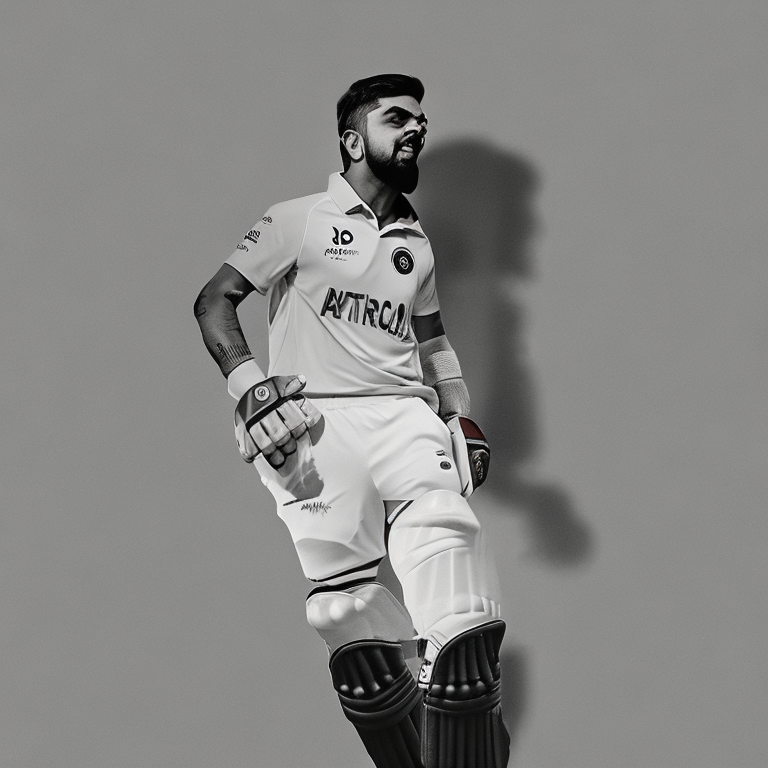

In [10]:
image

/bin/bash: line 1: ping: command not found
